**Baseline gradient descent**

In [ ]:
import torch

x = torch.tensor(
    [[1.,  2.,  3.,  4.],
     [5.,  6.,  7.,  8.],
     [9., 10., 11., 12.]], requires_grad=True) #requires_grad = true, если потом по тензору нужно будет считать производные

####### 
device = torch.device('cuda:0' 
                      if torch.cuda.is_available() 
                      else 'cpu')
x = x.to(device) #после переноса на gpu флаг градиента упадёт
x.retain_grad() #возвращаем возможность считать градиент для тензора (уже на gpu)

#######

function = 10 * (x ** 2).sum()

function.backward() #взятие производной: берём её от функции, но рез-т появляется в атрибуте .grad тензора

print(x.grad, '<- gradient')

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]]) <- gradient


In [ ]:
x.data -= 0.001 * x.grad #обновляем данные в тензоре через атр-т .data: уменьшаем на градиент*LR

In [ ]:
x.grad.zero_() # обнуляем градиент, т.к. в torch по умолчанию он кумулятивно накапливается
# операции с _ в torch являются inplace операциями

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

**Gradient descent with optimizer**

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def show_contours(objective,
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

In [ ]:
import torch

x = torch.tensor(
    [8., 8.], requires_grad=True)
var_history = []
fn_history = []

optimizer = torch.optim.SGD([x], lr=0.001)

def function_parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    optimizer.step()
    optimizer.zero_grad()
    
for i in range(500):
    var_history.append(x.data.numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

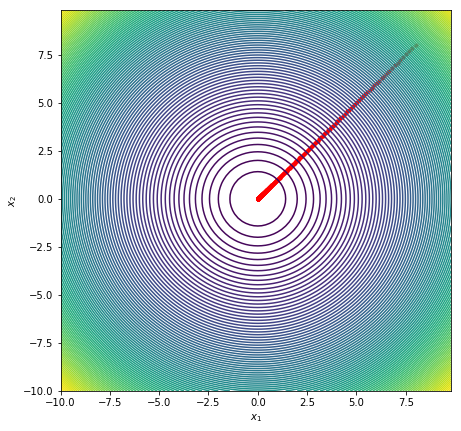

In [ ]:
show_contours(function_parabola)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r');

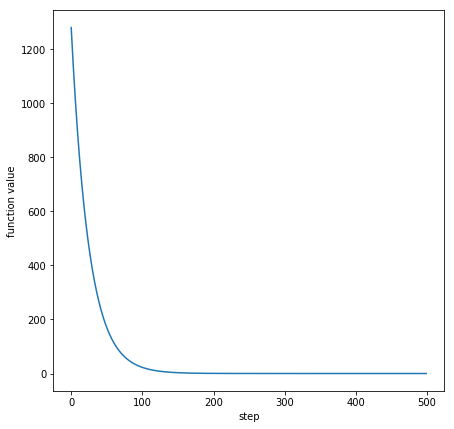

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(fn_history);
plt.xlabel('step')
plt.ylabel('function value');

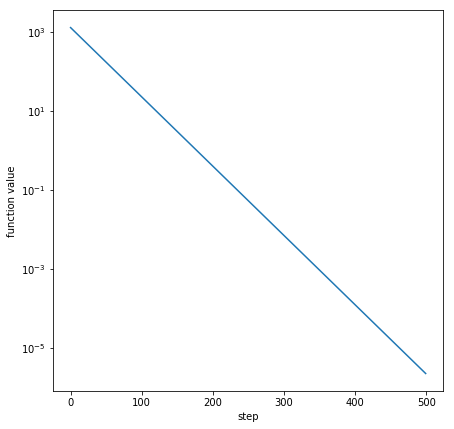

In [ ]:
plt.figure(figsize=(7,7))
plt.semilogy(fn_history);
plt.xlabel('step')
plt.ylabel('function value');